In [1]:
import numpy as np
from matplotlib import pyplot as plt

Base Improved Fighter Stats with Engine 3 and fighter designer

![Alt text](improved_fighter.png)

In [267]:
class module:
    def __init__(self, weight, code, cost):
        self.weight = weight
        self.code = code
        self.cost = cost
    def __lt__(self, other):
        return self.code < other.code

class weapon(module):
    def __init__(self, weight, code, cost, air_attack, agility):
        super().__init__(weight, code, cost)
        self.air_attack = air_attack
        self.agility = agility

class defense(module):
    def __init__(self, weight, code, cost, air_attack, agility, range, range_factor, air_defense):
        super().__init__(weight, code, cost)
        self.air_attack = air_attack
        self.agility = agility
        self.range = range
        self.range_factor = range_factor
        self.air_defense = air_defense

class PlaneException(Exception):
    def __init__(self, message):
        self.message = message
        super().__init__(self.message)        

class fighter:
    def __init__(self, weapons : list, defenses : list, double_engines : bool):
        # sanity check for weapons and defenses length
        if len(weapons) != 3 or len(defenses) != 3:
            raise PlaneException("Fighter must have 3 weapons and 3 defenses")
        
        self.double_engines = double_engines
        
        if double_engines:
            max_thrust = 45
            cost_base = 40
        else:
            max_thrust = 30
            cost_base = 24
        
        # total weight
        weight = sum([i.weight for i in weapons] + [i.weight for i in defenses]) + 5

        if weight > max_thrust:
            raise PlaneException("Max Thrust exceeded")

        cost = sum([i.cost for i in weapons] + [i.cost for i in defenses]) + cost_base

        if "strategic_materials" in [i.code for i in defenses]:
            cost *= 0.925

        range_mod = sum([i.range for i in defenses])
        range_factor_mod = sum([i.range_factor for i in defenses])

        agility = (65 + sum([i.agility for i in weapons] + [i.agility for i in defenses])) * 1.1

        agility = round(agility, 2)
        
        air_defense = 11 + sum([i.air_defense for i in defenses])
        air_attack = sum([i.air_attack for i in weapons] + [i.air_attack for i in defenses])

        range = (900 + range_mod) * (1 + range_factor_mod)
        speed = 680 - ((weight - 5) * 3)

        range = round(range, 2)

        if double_engines:
            speed -= 10

        # can't have more than one self-sealing

        # can't have more than one turret

        # can't have more than one strategic materials

        if len([i for i in defenses if i.code == "self_sealing"]) > 1:
            raise PlaneException("Can't have more than one self-sealing")
        
        if len([i for i in [j.code for j in defenses if j.code != "nothing"] if i.split('_')[1] == "tur"]) > 1:
            raise PlaneException("Can't have more than one turret")
        
        if len([i for i in defenses if i.code == "strategic_materials"]) > 1:
            raise PlaneException("Can't have more than one strategic materials")

        weapons.sort()
        defenses.sort()

    
        self.stats = {
            "weight": weight,
            "cost": cost,
            "range": range,
            "speed": speed,
            "agility": agility,
            "air_attack": air_attack,
            "air_defense": air_defense,
            "max_thrust": max_thrust
        }
        self.weapons = weapons
        self.defenses = defenses
        self.modules = {
            "weapons": weapons,
            "defenses": defenses
        }
        self.code_string = ",".join([i.code for i in weapons] + [i.code for i in defenses])
    def print_stats(self):
        for key,value in self.stats.items():
            print(f"{key}: {value}")
        for key,value in self.modules.items():
            print(f"{key}: {[i.code for i in value]}")
        print("Engines: " + ("Double" if self.double_engines else "Single"))

Weapons and Defense Modules under consideration. CAS modules will be exluded.

![Alt text](image-3.png)

![Alt text](image-5.png)

![Alt text](image-4.png)

In [268]:
# class weapon(module):
#     def __init__(self, weight, code, cost, air_attack, agility):
#         super().__init__(weight, code, cost)
#         self.air_attack = air_attack
#         self.agility = agility

# read in weapons
can1_1x = weapon(4, "can1_1x", 3, 10, -3)
can1_2x = weapon(8, "can1_2x", 6, 20, -6)
hmg_2x = weapon(1, "hmg_2x", 1.5, 6, 0)
hmg_4x = weapon(2, "hmg_4x", 3, 12, 0)
lmg_2x = weapon(1, "lmg_2x", 1, 4, 0)
lmg_4x = weapon(2, "lmg_4x", 2, 8, 0)
can2_1x = weapon(5, "can2_1x", 4, 12, -3)
can2_2x = weapon(10, "can2_2x", 8, 24, -6)
weapon_nothing = weapon(0, "nothing", 0, 0, 0)

weapons_list = [can1_1x, can1_2x, hmg_2x, hmg_4x, lmg_2x, lmg_4x, can2_1x, can2_2x, weapon_nothing]

# weight, code, cost, air_attack, agility, range, range_factor, air_defense
# read in defenses

can_tur_1x = defense(4, "can_tur_1x", 4, 8, -4, 0, 0, 0)
can_tur_2x = defense(8, "can_tur_2x", 8, 14, -7, 0, 0, 0)
hmg_tur_1x = defense(2, "hmg_tur_1x", 2, 6, -3, 0, 0, 0)
hmg_tur_2x = defense(4, "hmg_tur_2x", 4, 10, -6, 0, 0, 0)
lmg_tur_1x = defense(0, "lmg_tur_1x", 1, 4, -2, 0, 0, 0)
lmg_tur_2x = defense(1, "lmg_tur_2x", 2, 6, -3, 0, 0, 0)

armor_plates = defense(2, "armor_plates", 1, 0, 0, 0, -0.1, 4)
drop_tank = defense(2, "drop_tank", 2, 0, 0, 300, 0, 0)
fuel_tank = defense(1, "fuel_tank", 1, 0, 0, 0, 0.15, -2)
self_sealing = defense(1, "self_sealing", 1, 0, 0, 0, 0, 6)

# production effect of strategic materials are implemented in the fighter class
strategic_materials = defense(0, "strategic_materials", 0, 0, 0, 0, 0, -6)

defense_nothing = defense(0, "nothing", 0, 0, 0, 0, 0, 0)

defenses_list = [can_tur_1x, can_tur_2x, hmg_tur_1x, hmg_tur_2x, lmg_tur_1x, lmg_tur_2x, armor_plates, drop_tank, fuel_tank, self_sealing, strategic_materials, defense_nothing,]


From Wiki: https://hoi4.paradoxwikis.com/Air_combat

![Alt text](image-7.png)

Proporiton with two engines: 0.53


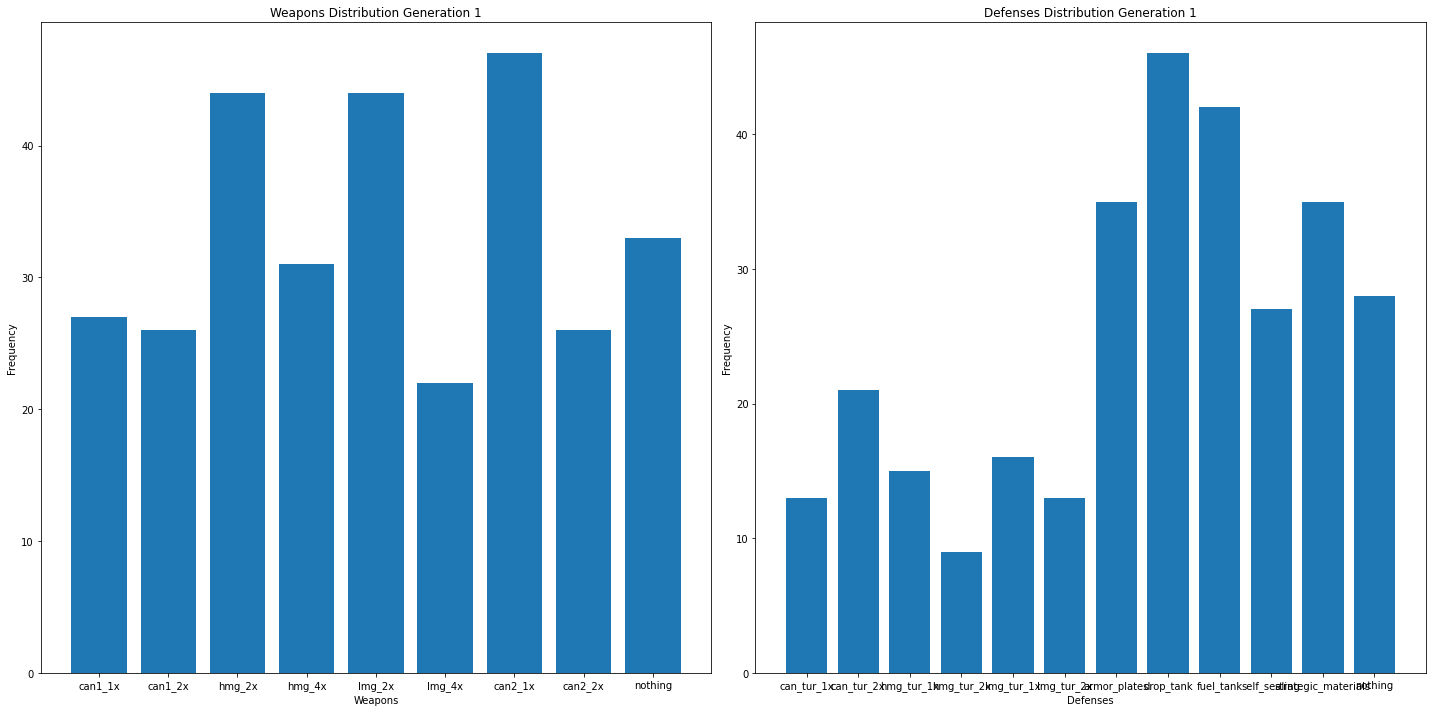

Generation 9 best fighter:
weight: 30
cost: 44
range: 720.0
speed: 605
agility: 58.3
air_attack: 56
air_defense: 25
max_thrust: 30
weapons: ['can1_2x', 'can2_2x', 'hmg_4x']
defenses: ['armor_plates', 'armor_plates', 'self_sealing']
Engines: Single
Proporiton with two engines: 0.0


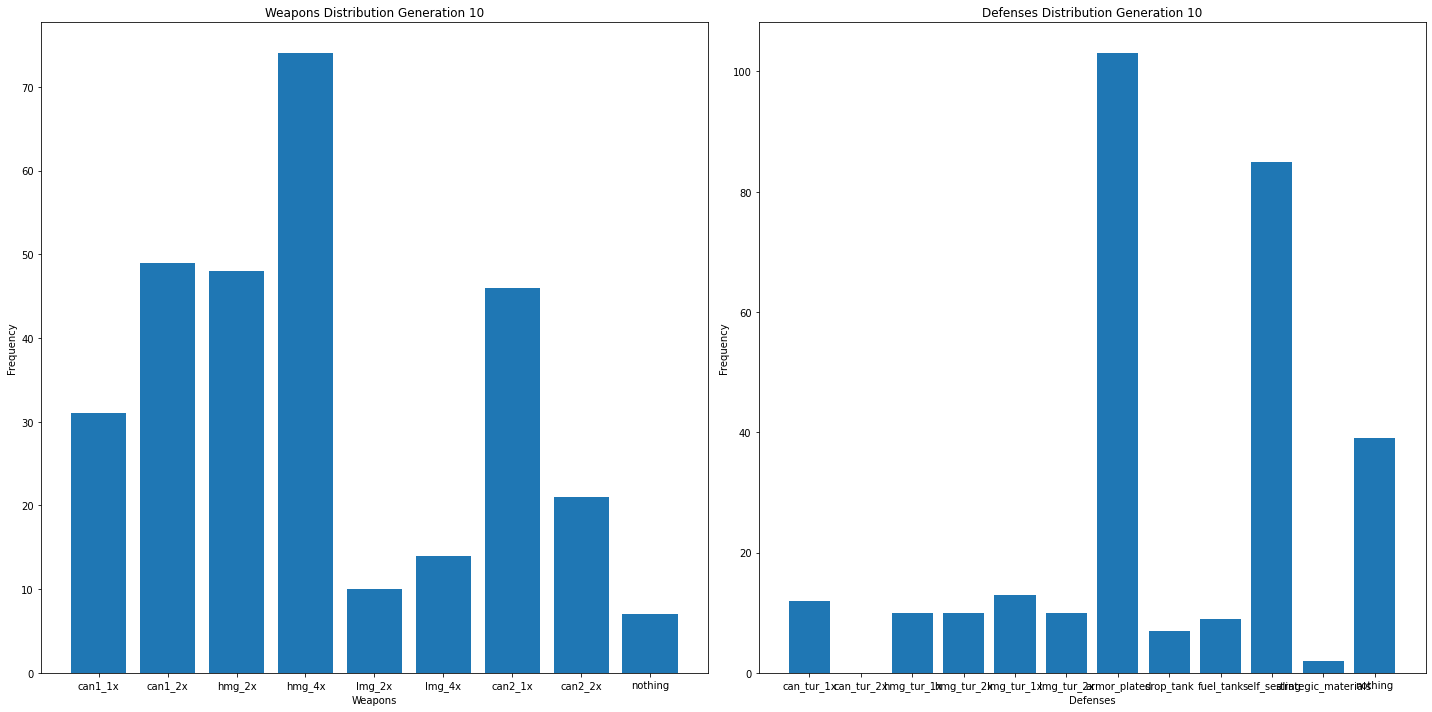

Generation 19 best fighter:
weight: 30
cost: 44
range: 720.0
speed: 605
agility: 58.3
air_attack: 56
air_defense: 25
max_thrust: 30
weapons: ['can1_2x', 'can2_2x', 'hmg_4x']
defenses: ['armor_plates', 'armor_plates', 'self_sealing']
Engines: Single
Proporiton with two engines: 0.0


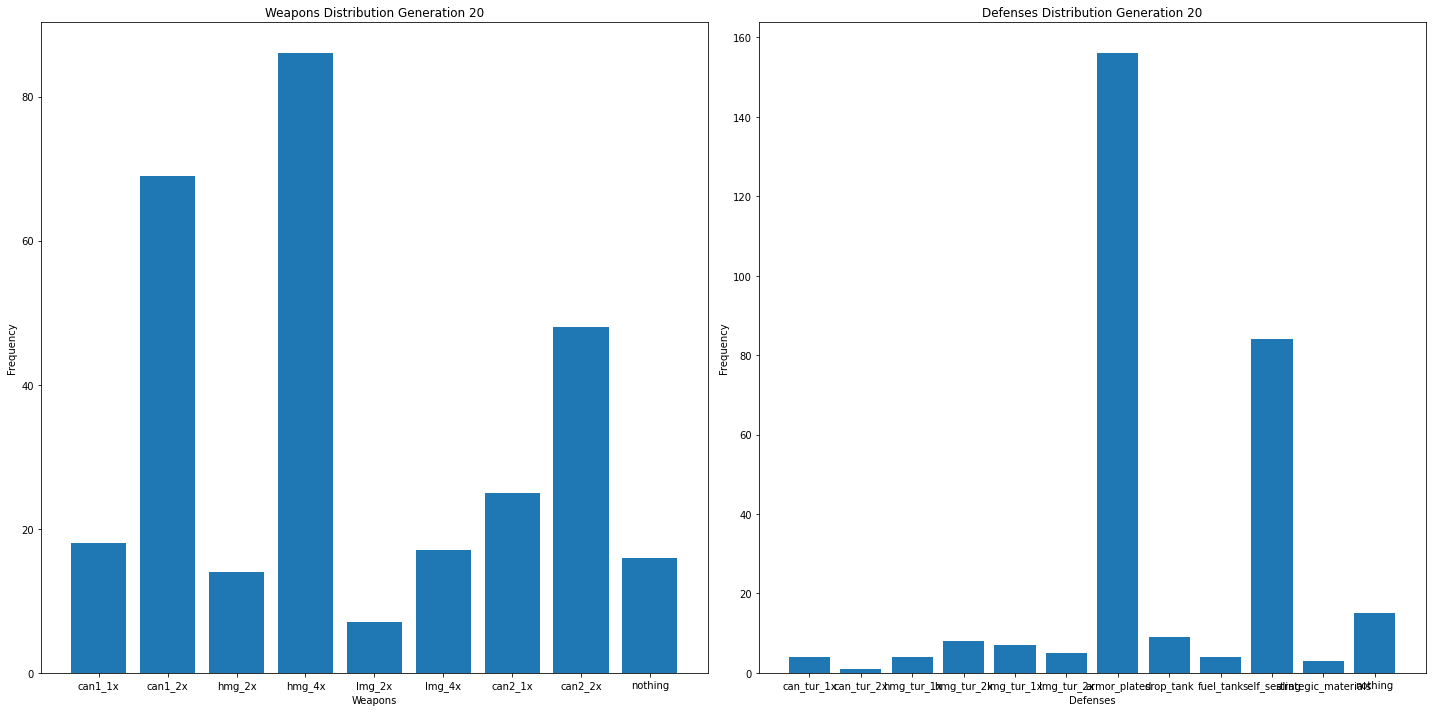

Generation 29 best fighter:
weight: 30
cost: 44
range: 720.0
speed: 605
agility: 58.3
air_attack: 56
air_defense: 25
max_thrust: 30
weapons: ['can1_2x', 'can2_2x', 'hmg_4x']
defenses: ['armor_plates', 'armor_plates', 'self_sealing']
Engines: Single
Proporiton with two engines: 0.0


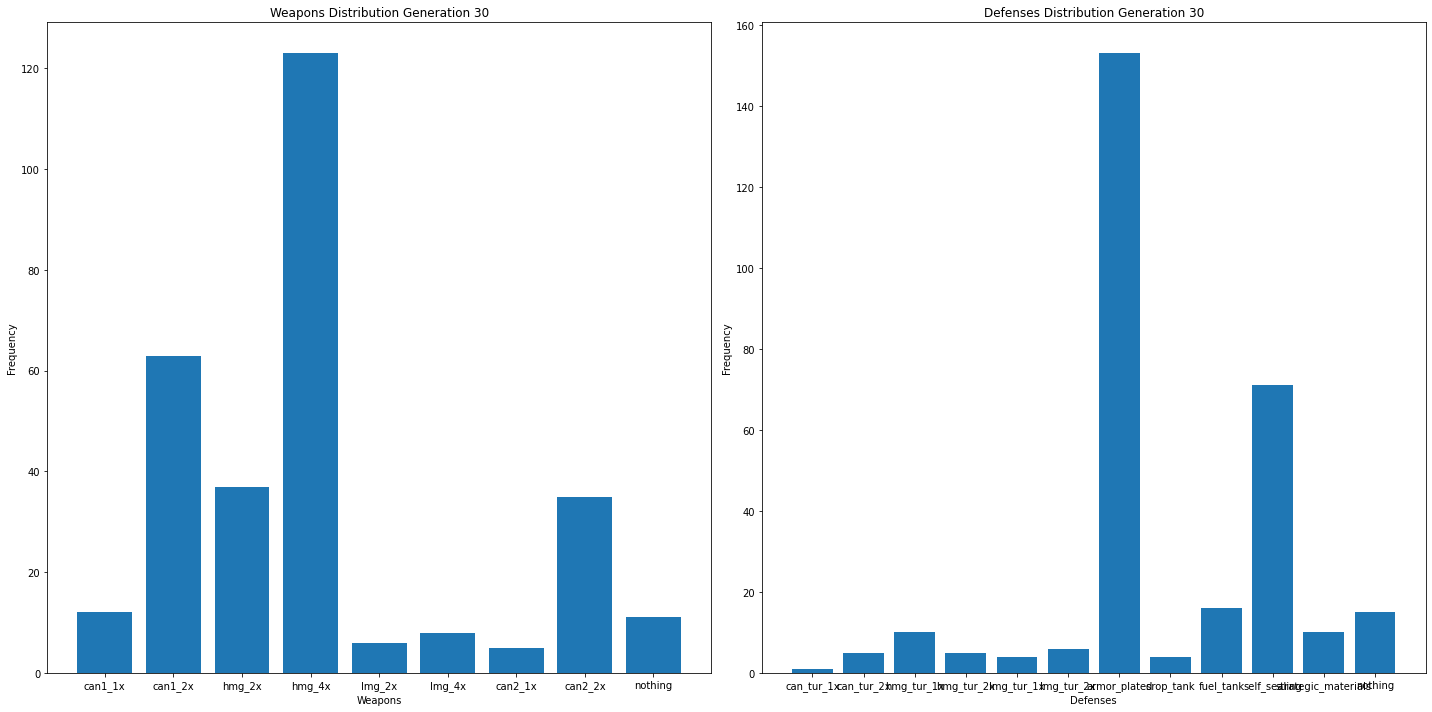

Generation 39 best fighter:
weight: 30
cost: 44
range: 720.0
speed: 605
agility: 58.3
air_attack: 56
air_defense: 25
max_thrust: 30
weapons: ['can1_2x', 'can2_2x', 'hmg_4x']
defenses: ['armor_plates', 'armor_plates', 'self_sealing']
Engines: Single
Proporiton with two engines: 0.0


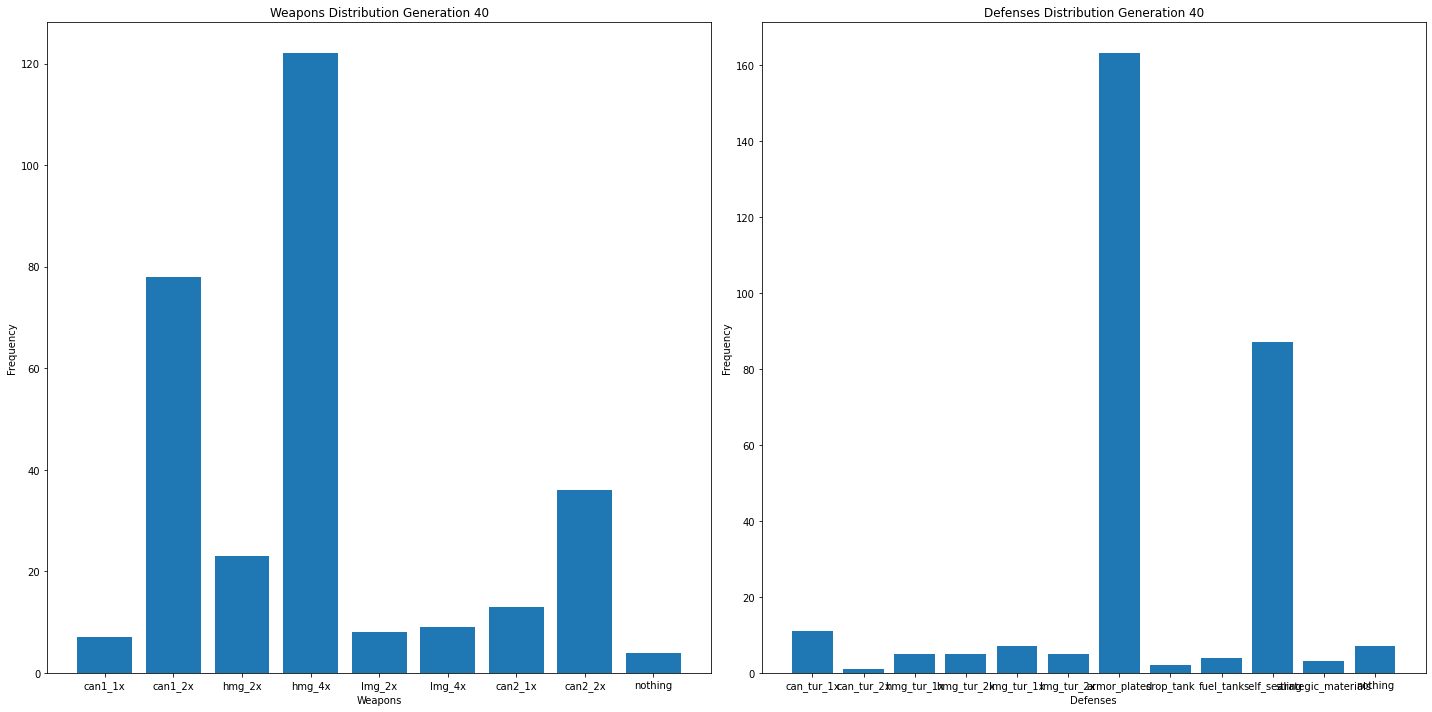

Generation 49 best fighter:
weight: 30
cost: 44
range: 720.0
speed: 605
agility: 58.3
air_attack: 56
air_defense: 25
max_thrust: 30
weapons: ['can1_2x', 'can2_2x', 'hmg_4x']
defenses: ['armor_plates', 'armor_plates', 'self_sealing']
Engines: Single
Proporiton with two engines: 0.0


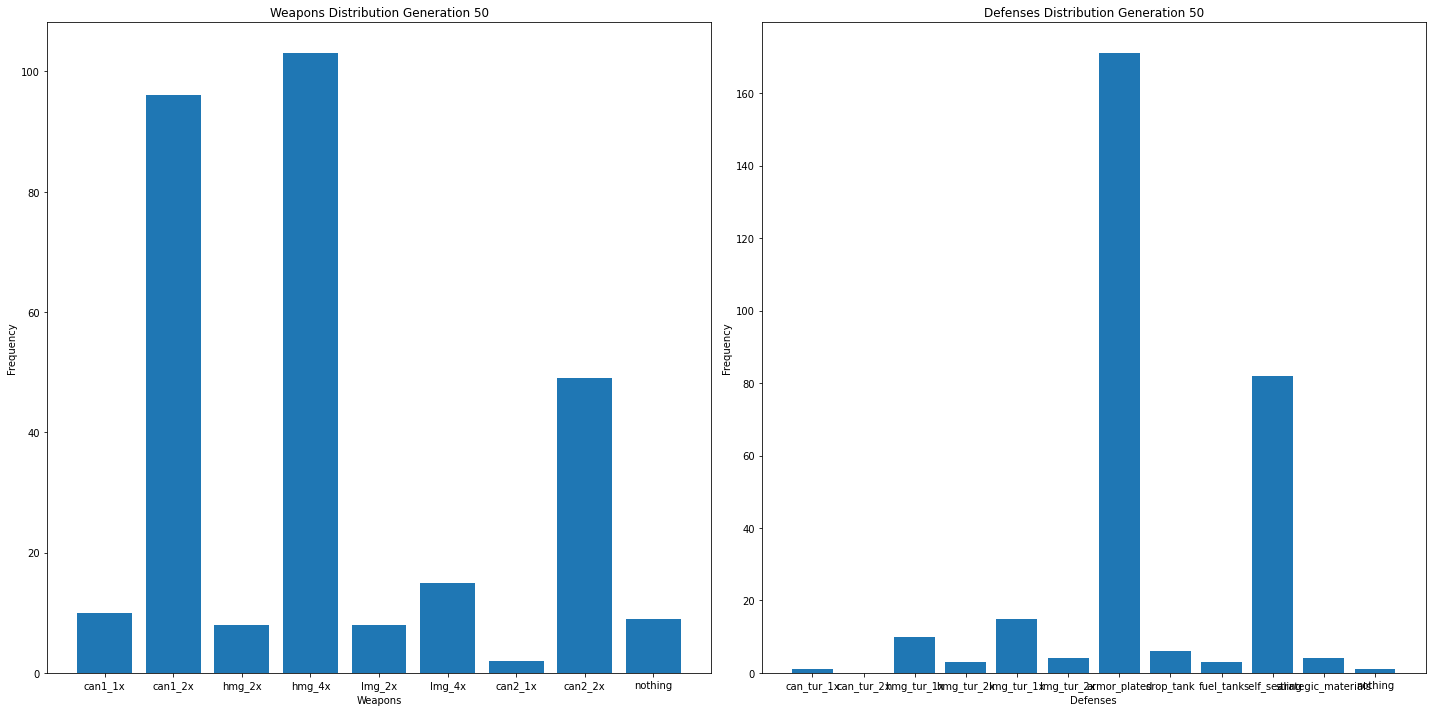

Generation 59 best fighter:
weight: 30
cost: 44
range: 720.0
speed: 605
agility: 58.3
air_attack: 56
air_defense: 25
max_thrust: 30
weapons: ['can1_2x', 'can2_2x', 'hmg_4x']
defenses: ['armor_plates', 'armor_plates', 'self_sealing']
Engines: Single
Proporiton with two engines: 0.0


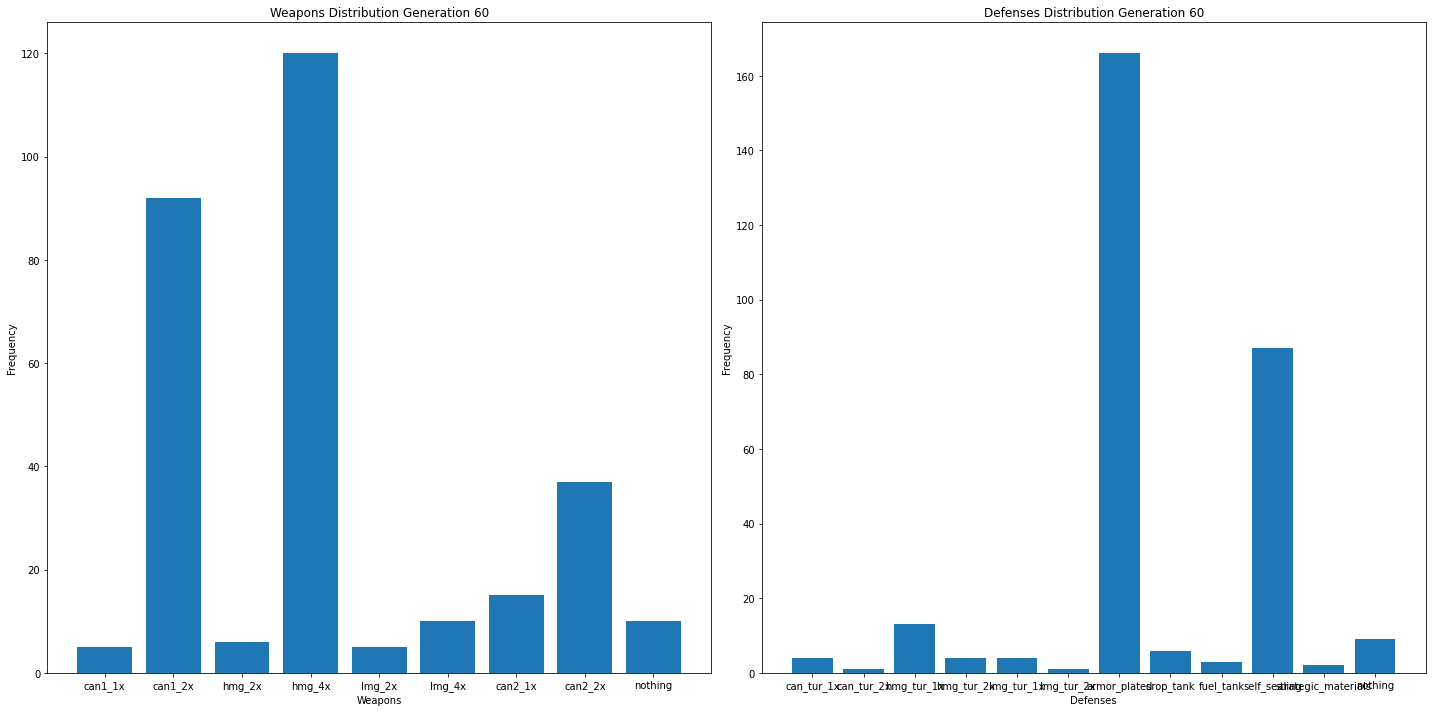

Generation 69 best fighter:
weight: 30
cost: 44
range: 720.0
speed: 605
agility: 58.3
air_attack: 56
air_defense: 25
max_thrust: 30
weapons: ['can1_2x', 'can2_2x', 'hmg_4x']
defenses: ['armor_plates', 'armor_plates', 'self_sealing']
Engines: Single
Proporiton with two engines: 0.0


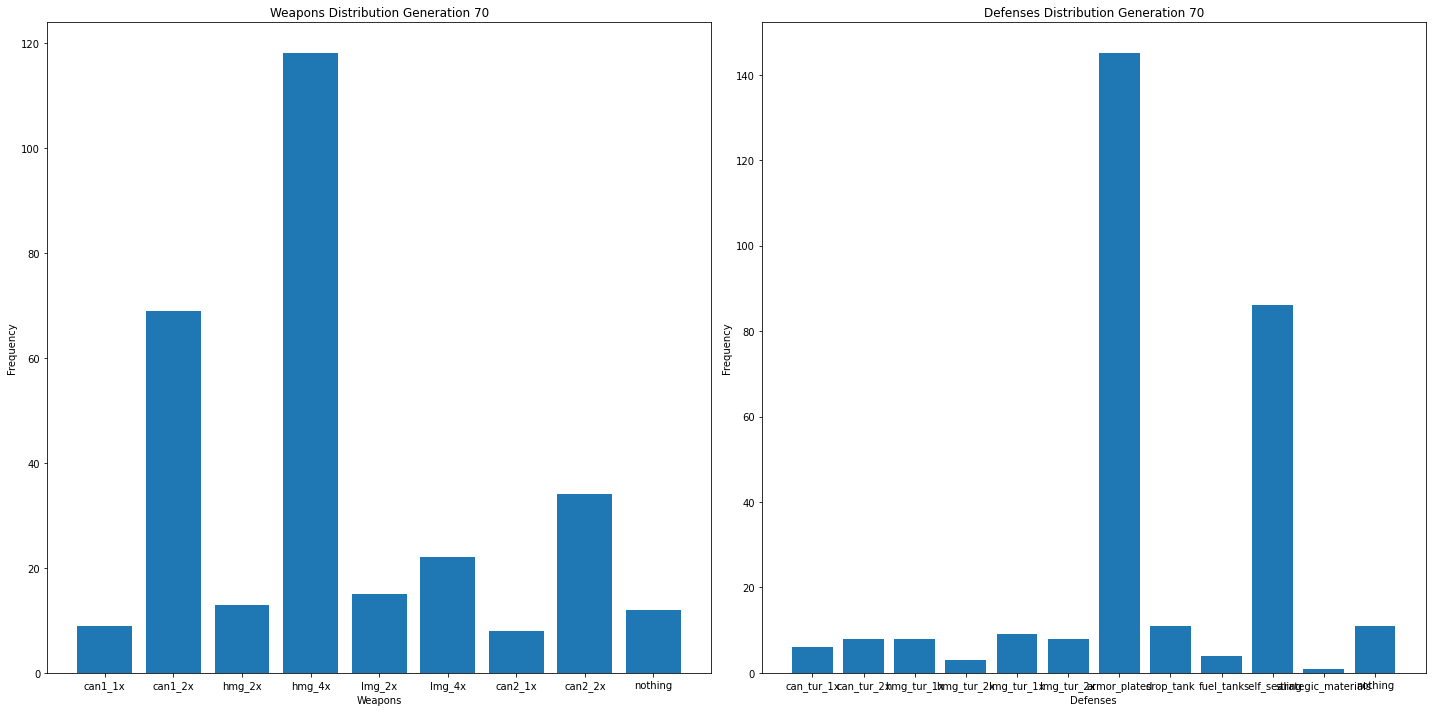

Generation 79 best fighter:
weight: 30
cost: 44
range: 720.0
speed: 605
agility: 58.3
air_attack: 56
air_defense: 25
max_thrust: 30
weapons: ['can1_2x', 'can2_2x', 'hmg_4x']
defenses: ['armor_plates', 'armor_plates', 'self_sealing']
Engines: Single
Proporiton with two engines: 0.0


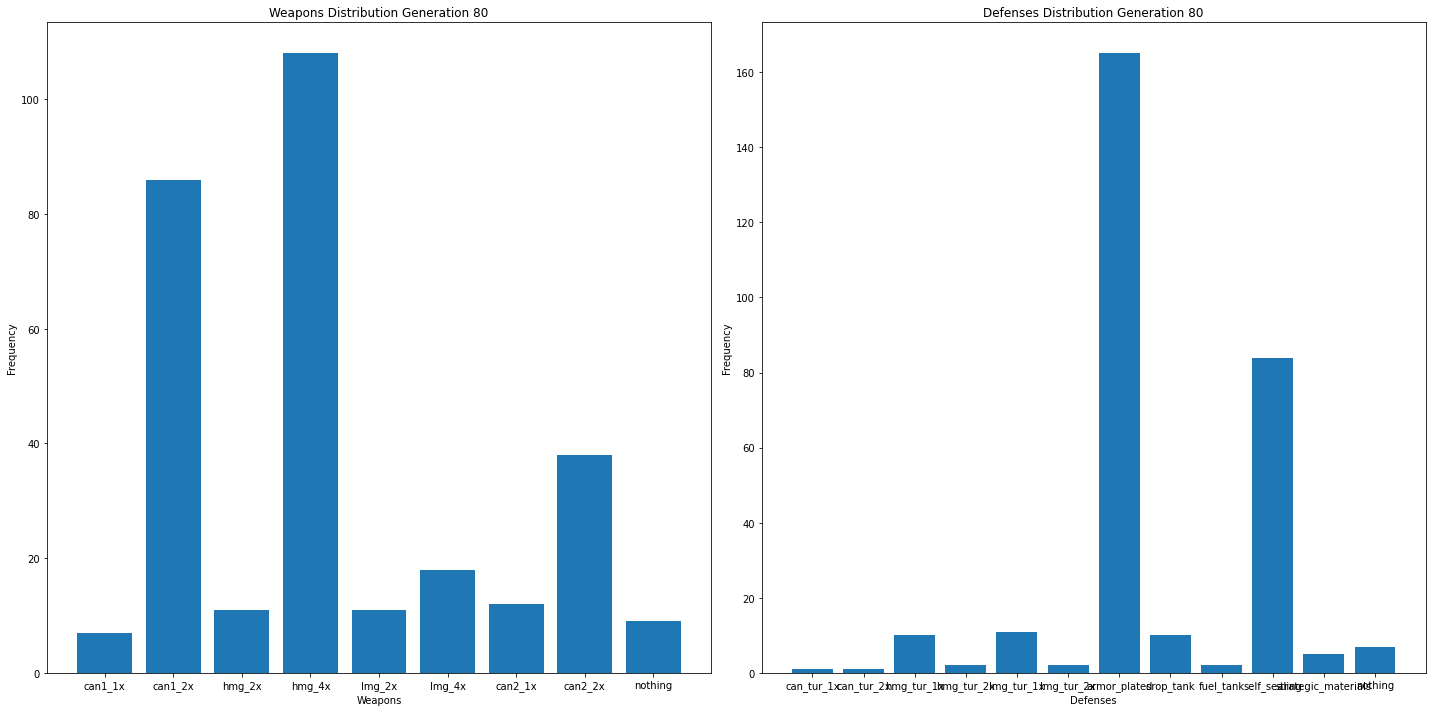

Generation 89 best fighter:
weight: 30
cost: 44
range: 720.0
speed: 605
agility: 58.3
air_attack: 56
air_defense: 25
max_thrust: 30
weapons: ['can1_2x', 'can2_2x', 'hmg_4x']
defenses: ['armor_plates', 'armor_plates', 'self_sealing']
Engines: Single
Proporiton with two engines: 0.0


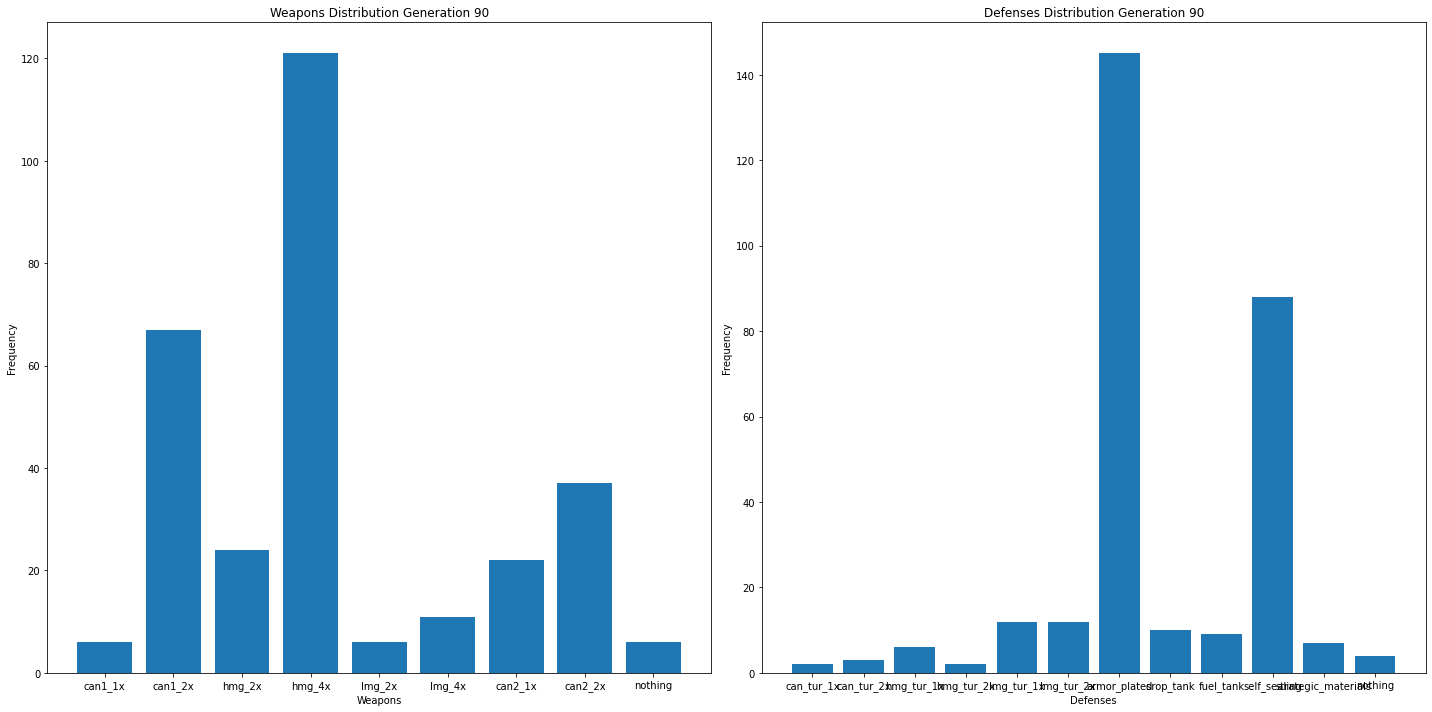

Generation 99 best fighter:
weight: 30
cost: 44
range: 720.0
speed: 605
agility: 58.3
air_attack: 56
air_defense: 25
max_thrust: 30
weapons: ['can1_2x', 'can2_2x', 'hmg_4x']
defenses: ['armor_plates', 'armor_plates', 'self_sealing']
Engines: Single
Proporiton with two engines: 0.0


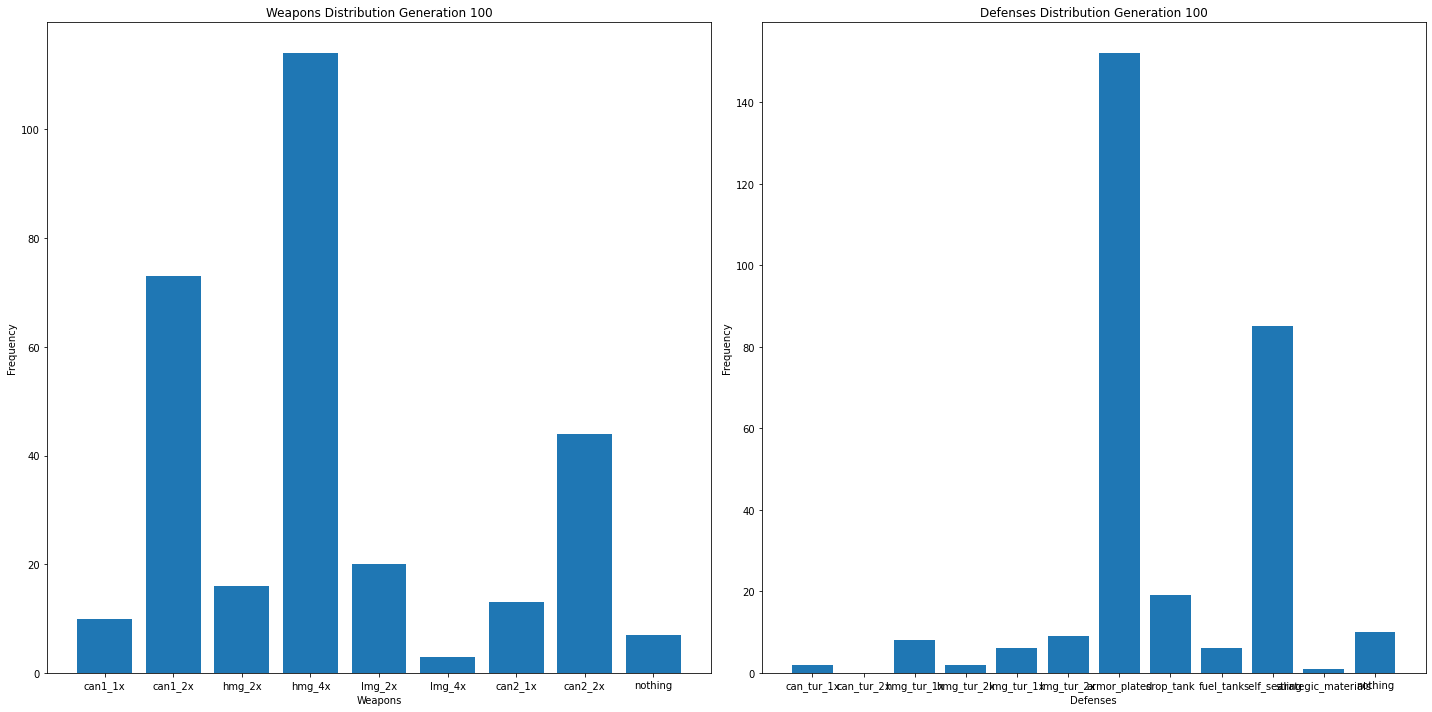

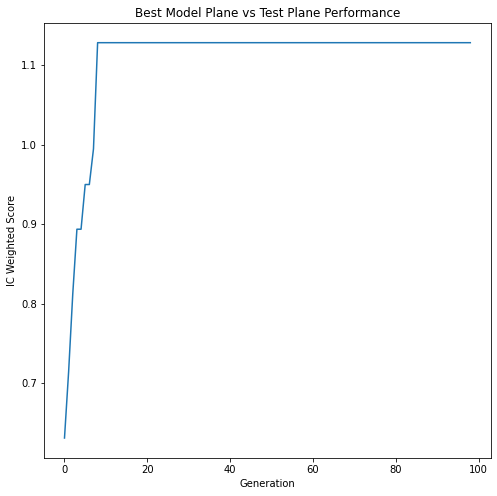

In [269]:
# try with 100 fighters per generation
cur_num_fighters = 0
num_fighters = 100

init_fighters = []

while cur_num_fighters != num_fighters:
    try:
        temp = fighter(np.random.choice(weapons_list, size=3, replace=True), np.random.choice(defenses_list, size=3, replace=True), np.random.choice([True, False], p=[0.5, 0.5]))
    except PlaneException as e:
        continue
    else:
        if temp.code_string not in [i.code_string for i in init_fighters]:
            init_fighters.append(temp)
            cur_num_fighters += 1

# return ic values of enemy fighters shot down
def combat_score(fighter_a, fighter_d):
    # take into account range
    # let 900km = 100% mission efficiency

    # max number of attackers is 3, min is 1
    number_of_attackers = min(3, max(1,(fighter_d.stats["cost"] / fighter_a.stats["cost"]) * min(1, fighter_a.stats["range"] / 900)))
    base_damage = number_of_attackers * fighter_a.stats["air_attack"] * 0.2
    agility_mitigation = round(base_damage * 0.3 * (min(fighter_d.stats["agility"] / fighter_a.stats["agility"], 4)  - 1))

    # only apply if attacker has speed advantage
    bonus_from_absolute_speed = 0
    bonus_from_relative_speed = 0

    if fighter_a.stats["speed"] > fighter_d.stats["speed"]:
        bonus_from_relative_speed = round(base_damage * 0.6 * (min(fighter_a.stats["speed"] / fighter_d.stats["speed"], 3.5) - 1))
        bonus_from_absolute_speed = round(base_damage * 0.025 / 100 * fighter_a.stats["speed"] / 800)

    return fighter_d.stats["cost"] * ((base_damage - agility_mitigation + bonus_from_relative_speed + bonus_from_absolute_speed) * 0.01 / fighter_d.stats["air_defense"])

class genetic_algorithm:
    def __init__(self, starting_generation : list, test_plane, debug = True, iterations = 100, mutation_chance = 0.2):
        # [ fighter , fitness, parent probability ]
        self.current_generation = np.array([[i,0,0] for i in starting_generation])
        self.population = len(self.current_generation)
        self.next_generation = np.empty((0,3))

        self.max_generations = iterations
        self.curr_gen_count = 1
        self.mutation_chance = mutation_chance
        
        self.combat_table = np.zeros((self.population, self.population))
        self.relative_advantage_table = np.zeros((self.population, self.population))

        self.test_plane = test_plane

        self.debug = debug

        self.best_fighter = None

    # creates a combat table for each fighter in generation:
    def create_combat_table(self):
        for i in range(self.population):
            for j in range(self.population):
                if i != j:
                    # row is attacker
                    self.combat_table[i][j] = combat_score(self.current_generation[i][0], self.current_generation[j][0])

    def normalize_combat_table(self):
        for i in range(self.population):
            for j in range(self.population):
                if i != j:
                    self.relative_advantage_table[i][j] = self.combat_table[i][j] / self.combat_table[j][i]
    
    def get_fitness(self):
        self.create_combat_table()
        self.normalize_combat_table()
        for i, score in zip(range(self.population), self.relative_advantage_table.sum(axis=1)):
            self.current_generation[i][1] = score

        # generated weighted parent probability
        total_fitness = self.current_generation[:,1].sum()
        for i in range(self.population):
            self.current_generation[i][2] = self.current_generation[i][1] / total_fitness

    def print_equipment_distribution(self):
        print(f"Proporiton with two engines: {len([i for i in self.current_generation[:,0] if i.double_engines]) / self.population}")

        generation_weapons = []
        generation_defenses = []
        for fighter in self.current_generation[:,0]:
            for i in fighter.weapons:
                generation_weapons.append(i.code)
            for i in fighter.defenses:
                generation_defenses.append(i.code)

        weapons_list_labels = [i.code for i in weapons_list]
        defenses_list_labels = [i.code for i in defenses_list]

        weapons_list_values = [generation_weapons.count(i) for i in weapons_list_labels]
        defenses_list_values = [generation_defenses.count(i) for i in defenses_list_labels]

        fig, ax = plt.subplots(1,2, figsize=(20,10))

        ax[0].bar(weapons_list_labels, weapons_list_values)
        ax[0].set_title(f"Weapons Distribution Generation {self.curr_gen_count}")
        ax[0].set_xlabel("Weapons")
        ax[0].set_ylabel("Frequency")

        ax[1].bar(defenses_list_labels, defenses_list_values)
        ax[1].set_title(f"Defenses Distribution Generation {self.curr_gen_count}")
        ax[1].set_xlabel("Defenses")
        ax[1].set_ylabel("Frequency")

        plt.tight_layout()

        plt.savefig("Equipment_Distribution_{}.png".format(self.curr_gen_count))

        plt.show()
    
    def generation(self):
        self.get_fitness()
        # append top two designs to next generation
        best = self.current_generation[self.current_generation[:,1].argsort()][-1]
        second_best = self.current_generation[self.current_generation[:,1].argsort()][-2]
        self.next_generation = np.vstack([self.next_generation, best])
        self.next_generation = np.vstack([self.next_generation, second_best])

        while len(self.next_generation) != self.population:
            # choose parents based on parent probability
            parents = np.random.choice(self.current_generation[:,0], size=2, replace=False, p=self.current_generation[:,2].astype(float))
            
            # continue breeding until valid child
            lparent = parents[0]
            rparent = parents[1]
            tries = 0

            while tries < 10:
                weapon_cross_over = np.random.randint(1, 3)
                defense_cross_over = np.random.randint(1, 3)

                child_weapons = list(np.concatenate((lparent.weapons[:weapon_cross_over], rparent.weapons[weapon_cross_over:]), axis = 0))
                child_defenses = list(np.concatenate((lparent.defenses[:defense_cross_over], rparent.defenses[defense_cross_over:]), axis = 0))
                child_engine = np.random.choice([True, False], p=[(lparent.double_engines + rparent.double_engines)/2, 1 - ((lparent.double_engines + rparent.double_engines)/2)])

                # mutation
                if np.random.choice([True,False], p=[self.mutation_chance, 1 - self.mutation_chance]):
                    child_weapons[np.random.randint(0,3)] = np.random.choice(weapons_list)
                    child_defenses[np.random.randint(0,3)] = np.random.choice(defenses_list)


                try:
                    child = fighter(child_weapons, child_defenses, child_engine)
                except PlaneException as e:
                    tries += 1
                    continue
                else:
                    self.next_generation = np.vstack([self.next_generation, [child, 0, 0]])
                    break
            
            

        if self.curr_gen_count == 1:
            self.print_equipment_distribution()

        self.current_generation = self.next_generation
        self.curr_gen_count += 1
        self.next_generation = np.empty((0,3))

        self.best_fighter = best[0]

        # get distribution of used defenses and weapons
        if self.curr_gen_count % 10 == 0:
            # print top fighter
            print(f"Generation {self.curr_gen_count - 1} best fighter:")
            best[0].print_stats()
            self.print_equipment_distribution()

    def train(self):
        test_history = []
        while self.curr_gen_count != self.max_generations:
            self.generation()
            # 1 means equal
            # 0.8 means test plane outperforms solution by 20%
            test_score = combat_score(self.best_fighter, self.test_plane) / combat_score(self.test_plane, self.best_fighter)
            if self.debug:
                print(f"Performance against test plane (IC Weighted Score): {test_score}")

            test_history.append(test_score)
            if self.debug:
                input("Press Enter to continue...")
        plt.figure(figsize=(8, 8))        
        plt.plot(test_history)
        plt.title("Best Model Plane vs Test Plane Performance")
        plt.xlabel("Generation")
        plt.ylabel("IC Weighted Score")

        plt.savefig("Test_Plane_Performance.png")

        return self.best_fighter

spitfire = fighter([can1_2x, can1_2x, hmg_4x], [armor_plates, self_sealing, drop_tank], False)
messer = fighter([can1_2x, hmg_4x, hmg_4x], [armor_plates, self_sealing, armor_plates], False)
        
model = genetic_algorithm(init_fighters, messer, debug = False)
solution = model.train()




In [261]:
solution.print_stats()

weight: 30
cost: 44
range: 720.0
speed: 605
agility: 58.3
air_attack: 56
air_defense: 25
max_thrust: 30
weapons: ['can1_2x', 'can2_2x', 'hmg_4x']
defenses: ['armor_plates', 'armor_plates', 'self_sealing']
Engines: Single
